In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/batang.ttc"  # 나눔고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [7]:
# 주요 통화 심볼 (KRW: 원화, EUR: 유로화, JPY: 일본 엔화, GBP: 영국 파운드, CNY: 위안화, AUD: 호주 달러, CAD: 캐나다 달러)
currencies = ['KRW=X', 'EUR=X', 'JPY=X', 'GBP=X', 'CNY=X', 'AUD=X', 'CAD=X']

# 전체 데이터 다운로드 ('max'로 최대 기간 데이터 다운로드)
data = yf.download(currencies, period='max', interval='1d')['Adj Close']

# 데이터 구간 선택 함수
def select_data(data, years):
    end_date = data.index.max()  # 가장 최신 날짜
    if years == 1:
        start_date = end_date - pd.DateOffset(years=1)
    elif years == 3:
        start_date = end_date - pd.DateOffset(years=3)
    elif years == 10:
        start_date = end_date - pd.DateOffset(years=10)
    elif years == 30:
        start_date = end_date - pd.DateOffset(years=30)
    else:
        raise ValueError("1년, 3년, 10년, 30년 중에서 선택하세요")
    return data.loc[start_date:end_date]

# 1년, 3년, 10년, 30년치 데이터 선택
data_1y = select_data(data, 1)
data_3y = select_data(data, 3)
data_10y = select_data(data, 10)
data_30y = select_data(data, 30)

[*********************100%***********************]  7 of 7 completed


In [8]:
# 각 기간별 변동률 계산 (일일 수익률)
returns_1y = data_1y.pct_change(fill_method=None).dropna()
returns_3y = data_3y.pct_change(fill_method=None).dropna()
returns_10y = data_10y.pct_change(fill_method=None).dropna()
returns_30y = data_30y.pct_change(fill_method=None).dropna()

# 원화와 다른 통화들의 상관계수 계산
krw_correlation_1y = returns_1y.corr()['KRW=X']
krw_correlation_3y = returns_3y.corr()['KRW=X']
krw_correlation_10y = returns_10y.corr()['KRW=X']
krw_correlation_30y = returns_30y.corr()['KRW=X']

# 결과 출력
print("1년치 원화와 통화간 상관계수:")
print(krw_correlation_1y)

print("\n3년치 원화와 통화간 상관계수:")
print(krw_correlation_3y)

print("\n10년치 원화와 통화간 상관계수:")
print(krw_correlation_10y)

print("\n30년치 원화와 통화간 상관계수:")
print(krw_correlation_30y)

1년치 원화와 통화간 상관계수:
Ticker
AUD=X    0.554224
CAD=X    0.464743
CNY=X    0.137089
EUR=X    0.582205
GBP=X    0.539748
JPY=X    0.462085
KRW=X    1.000000
Name: KRW=X, dtype: float64

3년치 원화와 통화간 상관계수:
Ticker
AUD=X    0.596332
CAD=X    0.523538
CNY=X    0.325702
EUR=X    0.544932
GBP=X    0.503630
JPY=X    0.406281
KRW=X    1.000000
Name: KRW=X, dtype: float64

10년치 원화와 통화간 상관계수:
Ticker
AUD=X    0.561874
CAD=X    0.474656
CNY=X    0.327737
EUR=X    0.427213
GBP=X    0.405263
JPY=X    0.259479
KRW=X    1.000000
Name: KRW=X, dtype: float64

30년치 원화와 통화간 상관계수:
Ticker
AUD=X   -0.012056
CAD=X    0.308382
CNY=X    0.117406
EUR=X    0.241290
GBP=X    0.272995
JPY=X    0.033614
KRW=X    1.000000
Name: KRW=X, dtype: float64


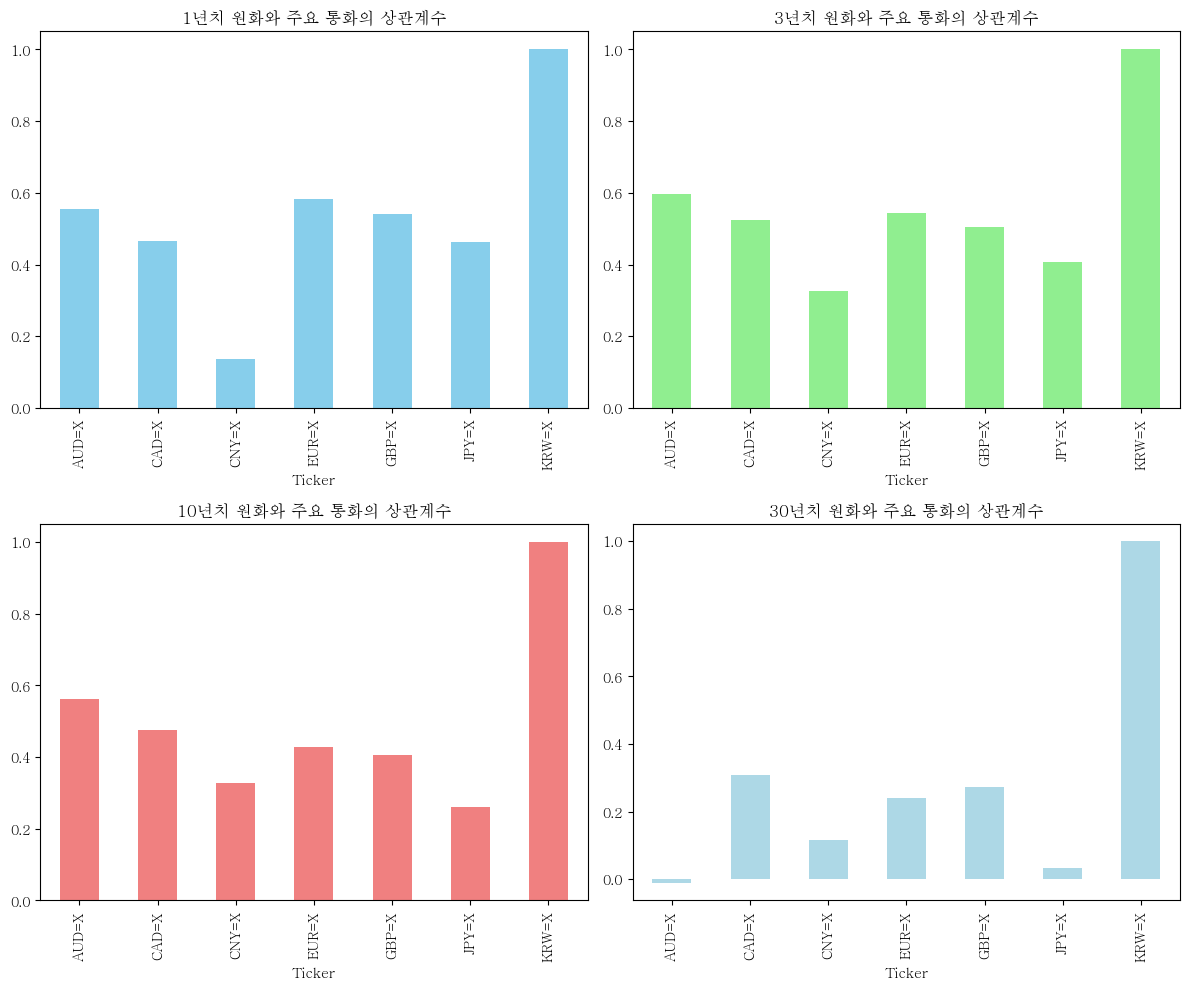

In [9]:
# 시각화 (상관계수 비교)
plt.figure(figsize=(12, 10))

# 1년치 상관계수 그래프
plt.subplot(2, 2, 1)
krw_correlation_1y.plot(kind='bar', color='skyblue')
plt.title('1년치 원화와 주요 통화의 상관계수')

# 3년치 상관계수 그래프
plt.subplot(2, 2, 2)
krw_correlation_3y.plot(kind='bar', color='lightgreen')
plt.title('3년치 원화와 주요 통화의 상관계수')

# 10년치 상관계수 그래프
plt.subplot(2, 2, 3)
krw_correlation_10y.plot(kind='bar', color='lightcoral')
plt.title('10년치 원화와 주요 통화의 상관계수')

# 30년치 상관계수 그래프
plt.subplot(2, 2, 4)
krw_correlation_30y.plot(kind='bar', color='lightblue')
plt.title('30년치 원화와 주요 통화의 상관계수')

plt.tight_layout()
plt.show()